# Problem 1 (2 points)

Recall that for the original GAN, the discriminator $f_\phi(x)$ is trained with the following optimization:

$$\max_\phi p(x) \log [f_\phi(x)] + q_\theta(x) \log [1 - f_\phi(x)]$$

where $p(x)$ is the true data distribution, $q_\theta(x)$ is the generator's learned distribution, and $f_\phi(x) \in [0, 1]$.

1. Assuming $q_\theta(x)$ is fixed, what is the solution to this optimization problem? "Solution" here means the function $f_\phi(x)$ that maximizes the above objective. Your expression should be in terms of $p(x)$ and $q_\theta(x)$.
1. Assume that $q_\theta(x) = p(x)$, i.e. the generator has learned to fit the data distribution perfectly. What is the optimal discriminator in this case?

1. The objective has the form $a \log(y) +b \log(1−y)$, where $a = p(x)$, $b = q_\theta(x)$, and $y = f_\phi(x)$. Differentiating with respect to $y$ and setting to zero gives
\begin{align}
0 &= \frac{a}{y} - \frac{b}{1 - y} \\
0 &= \frac{a(1 - y) - by}{y(1 - y)} \\
0 &= a - ay - by \\
y(a + b) &= a \\
y &= \frac{a}{a + b} \\
\end{align}
The second derivative is $-a/y^2 - b/(1 - y)^2$. $a$, $b$, and $y$ are all non-negative, so this second derivative is always negative. So, $y = \frac{a}{a - b}$ is the maximum. Substituting back in, we have $f_\theta(x) = \frac{p(x)}{p(x) + q_\theta(x)}$.

1. Plugging in $q_\theta(x) = p(x)$ we have $f_\theta(x) = 1/2$.

# Problem 2 (1 point)

Recall that the forward process for the Diffusion model is defined as

$$q(x_t | x_{t - 1}) = \mathop{\mathcal{N}}\left(x_t; \sqrt{1 - \beta_t} x_{t - 1}, \beta_t I\right)$$

Let $\bar{a}_t = \prod_{s = 1}^t (1 - \beta_s)$. Show that

$$q(x_t | x_0) = \mathop{\mathcal{N}}\left(x_t; \sqrt{\bar{a}_t} x_0, (1 - \bar{a})_t I\right)$$

Let $a_t = 1 - \beta_t$. Then we can equivalently express $x_t$ as
\begin{align*}
x_t = \sqrt{a_t}x_{t - 1} + \sqrt{1 - a_t}\epsilon
\end{align*}
where, whenever I use $\epsilon$, you can assume $\epsilon \sim \mathcal{N}(0, I)$.
Then we have
\begin{align*}
\sqrt{a_t}x_{t - 1} + \sqrt{1 - a_t}\epsilon = \sqrt{a_t a_{t - 1}}x_{t - 2} + \sqrt{1 - a_ta_{t - 1}}\epsilon
\end{align*}
because the sum of two Gaussian-distributed random variables with zero mean and variance $(1 - a_t)$ and $a_t(1 - a_{t - 1})$ (respectively) has variance $(1 - a_t) + a_t(1 - a_{t - 1}) = 1 - a_ta_{t - 1}$. Continuing on in this way and using the definition of $\bar{a}$ from above, we have $x_t = \sqrt{\bar{a}_t}x_0 + \sqrt{1 - \bar{a}_t}\epsilon$, which implies that
$$q(x_t | x_0) = \mathop{\mathcal{N}}\left(x_t; \sqrt{\bar{a}_t} x_0, (1 - \bar{a})_t I\right)$$

# Problem 3 (2 points)

Recall that, when training a VAE, we maximize the following objective:

$$\mathbb{E}_{z \sim q_\phi (z | x)} \log [p_\theta(x | z)] - \mathop{\text{KL}}(q_\phi(z | x) || p(z))$$

1. Show that this objective is equal to $\log p(x) - \mathop{\text{KL}}(q_\phi(z | x) || p(z | x))$ when the likelihood $p(x | z)$ is parameterized as $p_\theta(x | z)$ and explain why it is therefore less than or equal to $\log p(x)$.
1. Assume that $q(z)$ is a univariate Gaussian with mean $\mu = 0$ and standard deviation $\sigma \in \mathbb{R}$ and p(z) is a standard (zero-mean unit-variance) Gaussian. Derive a closed-form expression for $\mathop{\text{KL}}(q(z) || p(z))$ and plot it with respect to $\sigma$.

1. By definition, $\mathop{\text{KL}}(q_\phi(z | x) || p(z | x)) = \mathbb{E}_q \log q_\phi(z | x) - \mathbb{E}_q \log p(z | x)$. By Bayes' rule, we have $p(z | x) = p(x | z)p(z)/p(x)$, so $\mathbb{E}_q \log p(z | x) = \mathbb{E}_q\log p(x | z) + \mathbb{E}_q \log p(z) - \mathbb{E}_q \log p(x)$. Plugging in, we have
\begin{align*}
\log p(x) - \mathop{\text{KL}}(q_\phi(z | x) || p(z | x)) &= \log p(x) - \mathbb{E}_q \log q_\phi(z | x) + \mathbb{E}_q\log p(x | z) + \mathbb{E}_q \log p(z) - \mathbb{E}_q \log p(x) \\
&= - \mathbb{E}_q \log q_\phi(z | x) + \mathbb{E}_q\log p(x | z) + \mathbb{E}_q \log p(z) \\
&= \mathbb{E}_q \log p_\theta(x | z) - \mathop{\text{KL}}(q_\phi(z | x) || p(z))
\end{align*}
This is less than or equal to $\log p(x)$ because $\mathop{\text{KL}}(\cdot) \ge 0$.
2. Under this form of $q(z)$ and $p(z)$, the KL term becomes $\frac{1}{2} (1 + \log (\sigma^2) - \sigma^2)$. A plot is below.

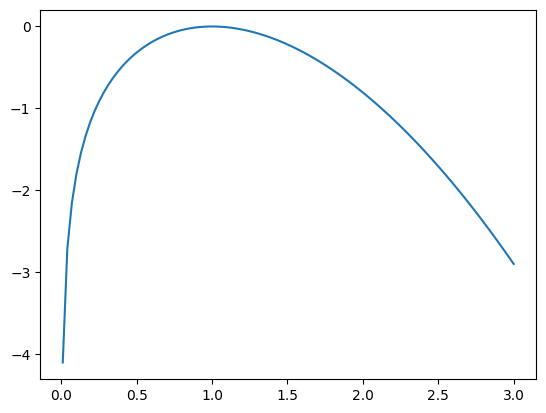

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sigma = np.linspace(0.01, 3, 100)
kl = 0.5*(1 + np.log(sigma**2) - sigma**2)
plt.plot(sigma, kl)